# Zero-shot DSR using DynaMix


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import sys
sys.path.append('..')

from src.model.dynamix import DynaMix
from src.model.forecaster import DynaMixForecaster
from src.metrics.metrics import geometrical_misalignment, temporal_misalignment, MASE
from src.utilities.plotting_eval import plot_3D_attractor, plot_2D_attractor, plot_TS_forecast
from src.utilities.utilities import load_hf_model

## Load Model

In [2]:
# Load the pre-trained model
model = load_hf_model("dynamix-3d-alrnn-v1.0")

# Set model to evaluation mode
model.eval()

# Initialize the forecaster
forecaster = DynaMixForecaster(model)

In [3]:
model.gating_network.sigma

Parameter containing:
tensor([0.0535, 0.0530, 0.0902], requires_grad=True)

In [4]:
model.gating_network.softmax_temp1

Parameter containing:
tensor([0.0591], requires_grad=True)

## 3D Dynamical Systems Reconstruction

### Lorenz 63

#### Load data

In [5]:
# Forecasting Hyperparameters
CL = 2000  # Context length
T = 10000  # Prediction length
system = "lorenz63"

# Load data
data = np.load(f"test_data/{system}.npy")
context = data[:CL,:]
ground_truth = data[CL:CL+T,:]

print(f"Data shape: {data.shape}")
print(f"Context shape: {context.shape}")
print(f"Ground truth shape: {ground_truth.shape}")

Data shape: (12000, 3)
Context shape: (2000, 3)
Ground truth shape: (10000, 3)


In [6]:
context_tensor = torch.tensor(context, dtype=torch.float32)

# Make prediction using the forecasting pipeline
with torch.no_grad():  # No gradient tracking needed for inference
    reconstruction = forecaster.forecast(
        context=context_tensor,
        horizon=T,
        standardize=True,
    )
    
# Convert back to numpy for evaluation and plotting
reconstruction_np = reconstruction.cpu().numpy()
print("Prediction shape: ", reconstruction_np.shape)

Prediction shape:  (10000, 3)


#### Calc. performance metrics and plot prediction results

Geometrical Disagreement: D_stsp = 0.811785
Temporal Disagreement: D_H = 0.078344
Prediction Error: MASE = 0.258090


/home/birk/Documents/Programmieren/DynaMix/notebooks/../src/utilities/plotting_eval.py:143: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


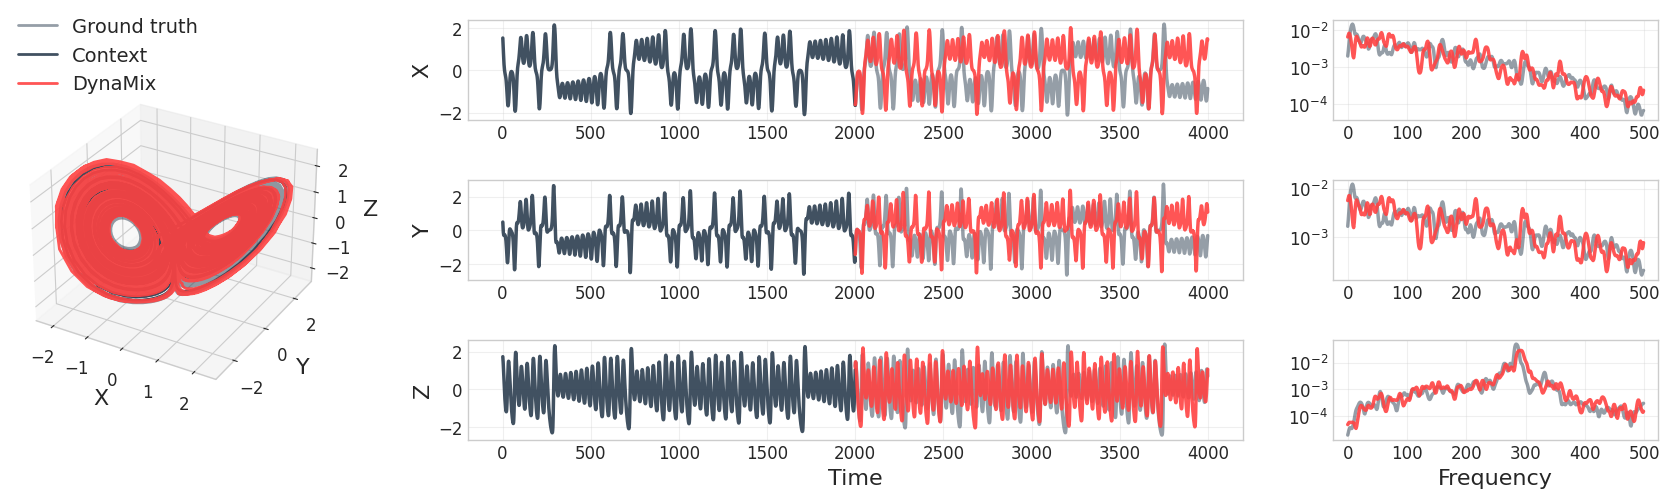

In [7]:
ground_truth_tensor = torch.tensor(ground_truth[:T,:], dtype=torch.float32)
reconstruction_tensor = torch.tensor(reconstruction_np[:T,:], dtype=torch.float32)

# Calculate metrics
bins = 30
smoothing = 20
mase_steps = 10

dstsp = geometrical_misalignment(reconstruction_tensor, ground_truth_tensor, n_bins=bins)
dh = temporal_misalignment(reconstruction_tensor, ground_truth_tensor, smoothing=smoothing)
pe = MASE(ground_truth_tensor, reconstruction_tensor, steps=mase_steps)

print(f"Geometrical Disagreement: D_stsp = {dstsp:.6f}")
print(f"Temporal Disagreement: D_H = {dh:.6f}")
print(f"Prediction Error: MASE = {pe:.6f}")

# Visualize the 3D attractor with time series and power spectrum
fig = plot_3D_attractor(context[:CL,:], reconstruction_np[:,:],ground_truth=ground_truth[:T,:],lim_pse=500)
plt.show()

### Chua

#### Load data

In [8]:
# Forecasting Hyperparameters
CL = 1028  # Context length
T = 10000  # Prediction length

# Load data
data = np.load("test_data/chua.npy")
context = data[:CL,:]
ground_truth = data[CL:CL+T,:]

print(f"Data shape: {data.shape}")
print(f"Context shape: {context.shape}")
print(f"Ground truth shape: {ground_truth.shape}")

Data shape: (12000, 3)
Context shape: (1028, 3)
Ground truth shape: (10000, 3)


#### Make predictions

In [9]:
context_tensor = torch.tensor(context, dtype=torch.float32)

# Make prediction using the forecasting pipeline
with torch.no_grad():  # No gradient tracking needed for inference
    reconstruction = forecaster.forecast(
        context=context_tensor,
        horizon=T,
        standardize=True,
    )
    
# Convert back to numpy for evaluation and plotting
reconstruction_np = reconstruction.cpu().numpy()
print("Prediction shape: ", reconstruction_np.shape)

Prediction shape:  (10000, 3)


#### Calc. performance metrics and plot prediction results

Geometrical Disagreement: D_stsp = 1.974855
Temporal Disagreement: D_H = 0.070723
Prediction Error: MASE = 0.209122


/home/birk/Documents/Programmieren/DynaMix/notebooks/../src/utilities/plotting_eval.py:143: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


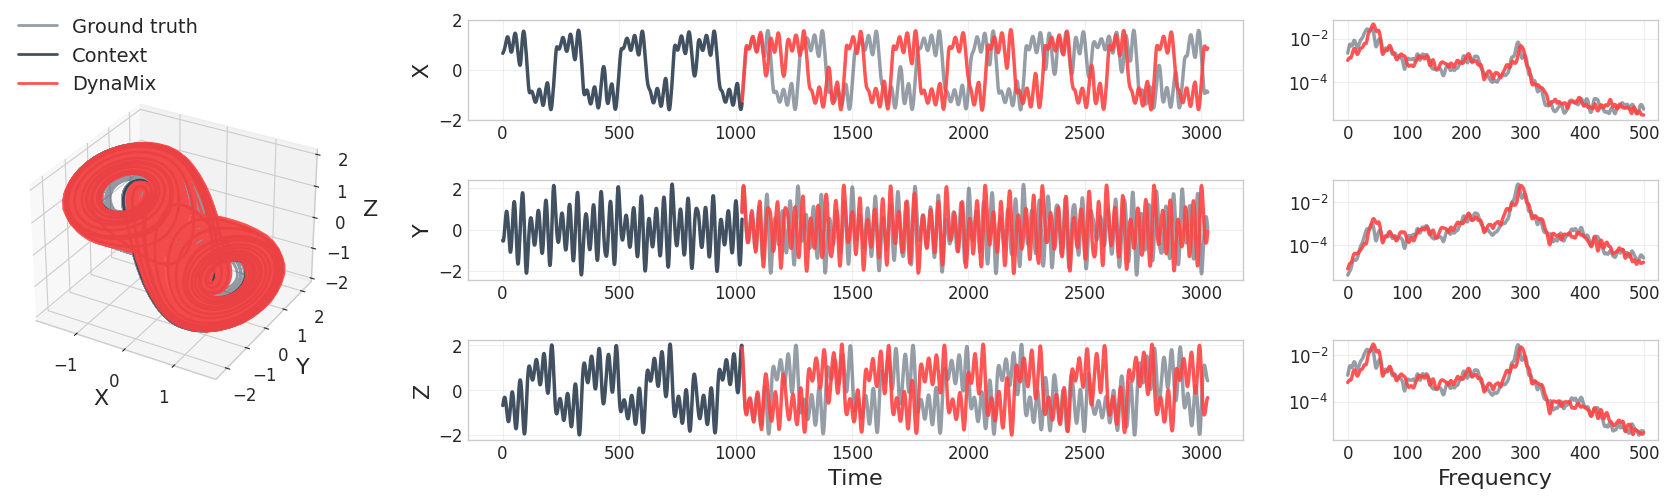

In [10]:
ground_truth_tensor = torch.tensor(ground_truth[:T,:], dtype=torch.float32)
reconstruction_tensor = torch.tensor(reconstruction_np[:T,:], dtype=torch.float32)

# Calculate metrics
bins = 30
smoothing = 20
mase_steps = 10

dstsp = geometrical_misalignment(reconstruction_tensor, ground_truth_tensor, n_bins=bins)
dh = temporal_misalignment(reconstruction_tensor, ground_truth_tensor, smoothing=smoothing)
pe = MASE(ground_truth_tensor, reconstruction_tensor, steps=mase_steps)

print(f"Geometrical Disagreement: D_stsp = {dstsp:.6f}")
print(f"Temporal Disagreement: D_H = {dh:.6f}")
print(f"Prediction Error: MASE = {pe:.6f}")

# Visualize the 3D attractor with time series and power spectrum
fig = plot_3D_attractor(context[:CL,:], reconstruction_np[:,:],ground_truth=ground_truth[:T,:],lim_pse=500)
plt.show()

### sprottM

#### Load data

In [11]:
# Forecasting Hyperparameters
CL = 512  # Context length
T = 10000  # Prediction length

# Load data
data = np.load("test_data/sprottM.npy")
context = data[:CL,:]
ground_truth = data[CL:CL+T,:]

print(f"Data shape: {data.shape}")
print(f"Context shape: {context.shape}")
print(f"Ground truth shape: {ground_truth.shape}")

Data shape: (12000, 3)
Context shape: (512, 3)
Ground truth shape: (10000, 3)


#### Make predictions

In [12]:
context_tensor = torch.tensor(context, dtype=torch.float32)

# Make prediction using the forecasting pipeline
with torch.no_grad():  # No gradient tracking needed for inference
    reconstruction = forecaster.forecast(
        context=context_tensor,
        horizon=T,
        standardize=True,
    )
    
# Convert back to numpy for evaluation and plotting
reconstruction_np = reconstruction.cpu().numpy()
print("Prediction shape: ", reconstruction_np.shape)

Prediction shape:  (10000, 3)


#### Calc. performance metrics and plot prediction results

Geometrical Disagreement: D_stsp = 3.213223
Temporal Disagreement: D_H = 0.103152
Prediction Error: MASE = 0.194018


/home/birk/Documents/Programmieren/DynaMix/notebooks/../src/utilities/plotting_eval.py:143: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


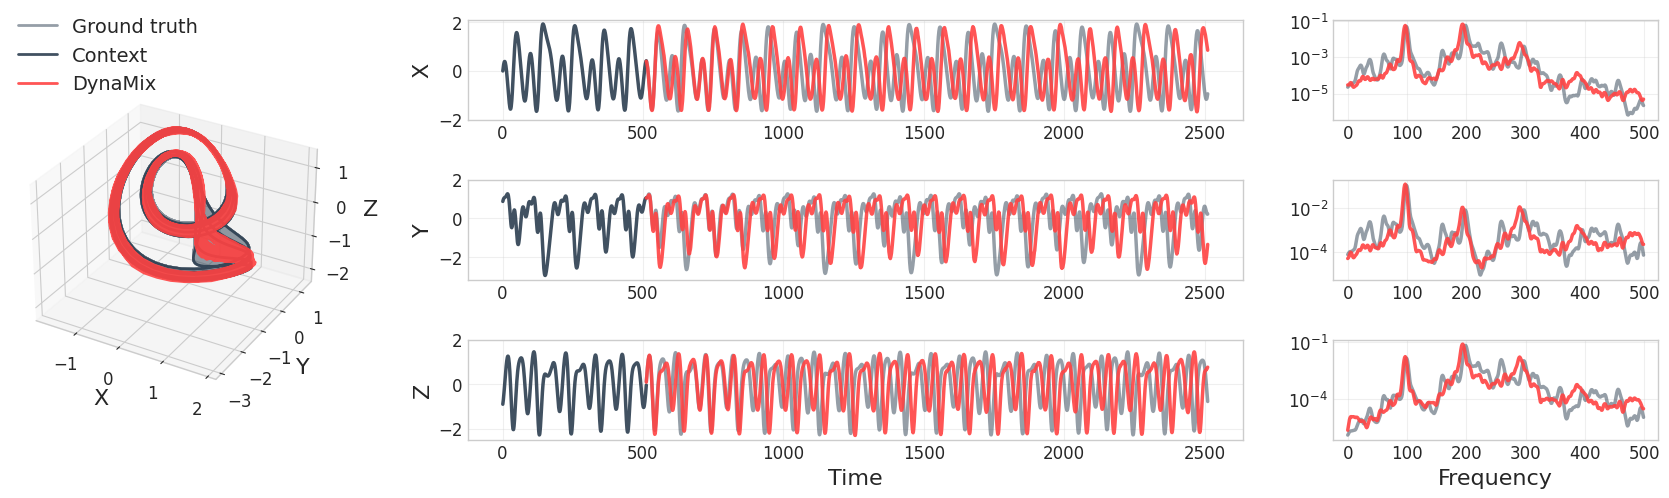

In [13]:
ground_truth_tensor = torch.tensor(ground_truth[:T,:], dtype=torch.float32)
reconstruction_tensor = torch.tensor(reconstruction_np[:T,:], dtype=torch.float32)

# Calculate metrics
bins = 30
smoothing = 20
mase_steps = 10

dstsp = geometrical_misalignment(reconstruction_tensor, ground_truth_tensor, n_bins=bins)
dh = temporal_misalignment(reconstruction_tensor, ground_truth_tensor, smoothing=smoothing)
pe = MASE(ground_truth_tensor, reconstruction_tensor, steps=mase_steps)

print(f"Geometrical Disagreement: D_stsp = {dstsp:.6f}")
print(f"Temporal Disagreement: D_H = {dh:.6f}")
print(f"Prediction Error: MASE = {pe:.6f}")

# Visualize the 3D attractor with time series and power spectrum
fig = plot_3D_attractor(context[:CL,:], reconstruction_np[:,:],ground_truth=ground_truth[:T,:],lim_pse=500)
plt.show()

## 2D Dynamical System Reconstruction

### Selkov

#### Load data

In [14]:
T = 100
initial = torch.tensor([1.0, -1.0], dtype=torch.float32)

# Load the Selkov data
context_2d = torch.tensor(np.load("test_data/selkov.npy"), dtype=torch.float32)

print("Context shape: ", context_2d.shape)
print("Initial shape: ", initial.shape)

Context shape:  torch.Size([135, 2])
Initial shape:  torch.Size([2])


#### Make predictions

In [15]:
# Make prediction
with torch.no_grad():  # No gradient tracking needed for inference
    reconstruction_2d = forecaster.forecast(
        context=context_2d,
        horizon=T,
        initial_x=initial,
        preprocessing_method="zero_embedding",
        standardize=False,
    )
    
# Convert to numpy for plotting
reconstruction_2d_np = reconstruction_2d.cpu().numpy()

print("Reconstruction shape: ", reconstruction_2d_np.shape)

Reconstruction shape:  (100, 2)


#### Visualize DS Reconstruction

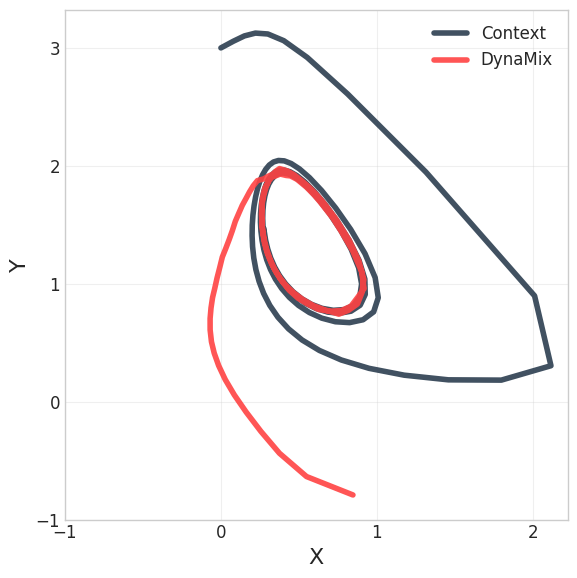

In [16]:
# Visualize the 2D attractor
fig = plot_2D_attractor(context_2d, reconstruction_2d_np)
plt.show()